In [6]:
import pandas as pd
from IPython.display import display

data = pd.read_csv('profiles.csv')
data.isnull().sum()
col = ['drinks', 'drugs', 'education', 'job', 'offspring', 'orientation', 'pets', 'smokes', 'status']
data[col] = data[col].fillna(data.mode().iloc[0])

features = data.iloc[:,:-2].values
labels = data.iloc[:,-1].values

df1 = pd.DataFrame(features)
df2 = pd.DataFrame(labels)

df1 = pd.get_dummies(df1)
df2 = pd.get_dummies(df2)

In [2]:
#split test and training data according to random state
from sklearn.model_selection import train_test_split
df1_train,df1_test,df2_train,df2_test = train_test_split(df1, df2, stratify = df2, random_state = 42)

In [9]:
#used logistic Regression to predict gender
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(df1_train, df2_train.values.ravel())
y_pred = log_reg.predict(df1_test)

In [4]:
#determined accuracy score
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics

print('Coefficients (m): \n', log_reg.coef_)
print('Intercept (b): \n', log_reg.intercept_)
print(accuracy_score(df2_test, y_pred))
print("Probability of prediction: \n",log_reg.predict_proba(df1_train))
print(metrics.confusion_matrix(df2_test, y_pred))

Coefficients (m): 
 [[ 9.12432584e-01  1.14502912e+00  4.28798955e-01 -3.29150144e+00
  -1.72251541e+00  8.96614869e-01  7.55994834e-01 -5.85041226e-02
   2.07543547e-01  8.82194939e-01  1.81787636e-01  4.64837492e-01
   2.33325970e-01  5.30562039e-02 -2.95470048e-01 -4.81449374e-01
   1.92850905e-01  8.91242191e-03  8.94521223e-02 -1.35127570e-01
  -2.52324538e-01  4.38430502e-01 -3.00180839e-02 -3.21099235e-01
   6.94173631e-01 -2.99826619e-01 -8.66189424e-02  4.65729644e-01
  -7.86861017e-03  4.57517996e-01  4.68116817e-01 -4.36094393e-01
  -7.83500347e-01 -3.12546966e-02 -1.58026363e-01  1.94838998e-01
  -2.23316586e-01  1.19768377e-02 -1.35483419e+00  1.35854902e+00
   1.71059708e+00 -8.77044244e-01  2.57650655e-01  2.54767576e-01
  -2.93005559e-01 -3.85792370e-01 -9.95599317e-01  9.95211486e-01
  -5.13865560e-01 -2.23482732e-01 -1.67638299e-01 -7.72933617e-02
  -4.70441920e-01  7.06867532e-01 -3.00815855e-01  9.67011858e-01
  -2.23414177e-01  2.50379108e-01  4.16210082e-02  2.267

Index(['0_a little extra', '0_athletic', '0_average', '0_curvy',
       '0_full figured', '0_jacked', '0_overweight', '0_rather not say',
       '0_skinny', '0_used up', '1_anything', '1_halal', '1_kosher', '1_other',
       '1_vegan', '1_vegetarian', '2_not at all', '2_often', '2_rarely',
       '2_socially', '3_never', '3_often', '3_sometimes',
       '4_college/university', '4_dropped out of high school',
       '4_dropped out of law school', '4_dropped out of masters program',
       '4_dropped out of med school', '4_dropped out of ph.d program',
       '4_dropped out of space camp', '4_high school', '4_law school',
       '4_masters program', '4_med school', '4_ph.d program', '4_space camp',
       '5_artistic / musical / writer', '5_banking / financial / real estate',
       '5_clerical / administrative', '5_computer / hardware / software',
       '5_construction / craftsmanship', '5_education / academia',
       '5_entertainment / media', '5_executive / management',
       '5_ho

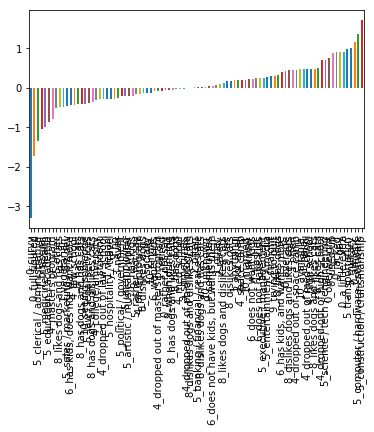

5_construction / craftsmanship      1.710597
5_computer / hardware / software    1.358549
0_athletic                          1.145029
5_military                          0.995211
5_transportation                    0.967012
0_a little extra                    0.912433
7_gay                               0.911870
0_jacked                            0.896615
0_used up                           0.882195
0_overweight                        0.755995
5_science / tech / engineering      0.706868
4_dropped out of high school        0.694174
8_likes cats                        0.501780
8_likes dogs and likes cats         0.476008
4_high school                       0.468117
4_dropped out of med school         0.465730
1_halal                             0.464837
10_available                        0.460074
4_dropped out of space camp         0.457518
3_often                             0.438431
8_dislikes dogs and likes cats      0.436564
0_average                           0.428799
6_has kids

In [16]:
#plotted results
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

coefs = pd.Series(log_reg.coef_[0], index=df1_train.columns)
print (df1_train.columns)
coefs = coefs.sort_values()
plt.subplot(1,1,1)
coefs.plot(kind="bar")
plt.show()
print (coefs.sort_values(ascending = False))

In [17]:
# Calculating 10 fold cross validation results
model = LogisticRegression()
kf = KFold(n_splits=10)
scores = cross_val_score(model, df1_test, df2_test.values.ravel(), cv=kf)
print("Accuracy of every fold in 5 fold cross validation: ", abs(scores))
print("Mean of the 5 fold cross-validation: %0.2f" % abs(scores.mean()))

Accuracy of every fold in 5 fold cross validation:  [0.75183456 0.72981988 0.73448966 0.72381588 0.74516344 0.71114076
 0.7329773  0.72363151 0.72763685 0.73364486]
Mean of the 5 fold cross-validation: 0.73
